## Chapter 10, Example 1

In [1]:
import os
import pylab
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Create figures directory if it doesn't exist
if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

creating the figures folder


In [2]:
# Define input patterns
X = torch.tensor([[1, 0, 1, 0, 0],
                  [0, 0, 1, 1, 0],
                  [1, 1, 0, 1, 1],
                  [0, 1, 1, 1, 0]], dtype=torch.float32)

# Set the random seed for reproducibility
seed = 20
torch.manual_seed(seed)

# Defining an Autoencoder

In this section, we define a simple autoencoder. An autoencoder is a type of artificial neural network used to learn efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction.

## Class Definition: `Autoencoder`

The `Autoencoder` class inherits from `nn.Module` and customizes the building blocks of its neural network.

### Initialization Method: `__init__`

- **Parameters**:
    - `n_input` (int): The number of input neurons (dimension of the input data).
    - `n_hidden` (int): The number of neurons in the hidden layer. This parameter dictates the encoding dimension.

- **Attributes**:
    - `self.W` (Tensor): Weights for the input to hidden layer transformation, initialized with a standard normal distribution scaled by `1/sqrt(n_input)` for stability.
    - `self.b` (Tensor): Biases for the hidden layer, initialized as zeros.
    - `self.b_prime` (Tensor): Biases for the reconstruction layer, initialized as zeros.

### Forward Method: `forward`

- **Parameters**:
    - `x` (Tensor): The input data to the autoencoder.

- **Operations**:
    1. **Encoding**: Computes the hidden layer activations `h` using a sigmoid activation function. This represents the encoded input data.
    2. **Decoding**: Computes the reconstruction `y` from the hidden representation `h` using the transposed weights `self.W.t()` and adding the bias `self.b_prime`. The sigmoid activation function is applied to the output.
    3. **Binarization**: Produces a binary output `o` by applying a threshold of 0.5 to the reconstructed output `y`.

- **Returns**:
    - `y` (Tensor): The reconstructed data (decoded output).
    - `o` (Tensor): The binarized version of the reconstructed data.

## Creating an Instance of the Autoencoder

An instance of the `Autoencoder` class is created with `n_input=5` and `n_hidden=3`, specifying the dimensions of the input and the hidden layer, respectively.

```python
autoencoder = Autoencoder(n_input=5, n_hidden=3)


In [3]:
class Autoencoder(nn.Module):
    def __init__(self, n_input, n_hidden):
        super(Autoencoder, self).__init__()
        # Initialize weights and biases
        self.W = nn.Parameter(torch.randn(n_input, n_hidden) * np.sqrt(1. / n_input))
        self.b = nn.Parameter(torch.zeros(n_hidden))
        self.b_prime = nn.Parameter(torch.zeros(n_input))

    def forward(self, x):
        h = torch.sigmoid(torch.matmul(x, self.W) + self.b)
        y = torch.sigmoid(torch.matmul(h, self.W.t()) + self.b_prime)
        o = torch.where(y > 0.5, torch.ones_like(y), torch.zeros_like(y))
        return y, o

autoencoder = Autoencoder(n_input=5, n_hidden=3)

# Understanding the Training Code

In this section, we'll explain the PyTorch code used for training an autoencoder. We define the optimizer, the custom loss function, and the training function.

## Optimizer

The first part of the code defines the optimizer that we'll use for training:

```python
optimizer = optim.SGD(autoencoder.parameters(), lr=0.1)
```

## Custom Loss Function

Next, we define a custom loss function for our training:

```python
def loss(y, o, original):
    entropy_loss = nn.BCELoss()(y, original)
    bit_loss = torch.sum(o != original).item()
    return entropy_loss, bit_loss
```

This function calculates two types of loss and returns them:

1. **Binary Cross-Entropy Loss (BCELoss)**: This is a common loss function used for binary classification tasks. Here, it measures the difference between the output `y` (reconstructed images) and the `original` images. It quantifies how well the reconstructed images from the autoencoder match the original images.

2. **Bit Loss**: This is a custom loss based on comparing the binary output `o` from the model to the `original` input. It calculates the sum of differing elements, representing how many bits differ between the two binary tensors. Note that this isn't a standard loss but more of an informative metric.


In [4]:
# Define optimizer
optimizer = optim.SGD(autoencoder.parameters(), lr=0.1)

# Loss function
def loss(y, o, original):
    entropy_loss = nn.BCELoss()(y, original)
    bit_loss = torch.sum(o != original).item()
    return entropy_loss, bit_loss

In [ ]:
# Training function
def train(original):
    optimizer.zero_grad()  # Zero gradients
    y, o = autoencoder(original)  # Forward pass
    entropy_loss, bit_loss = loss(y, o, original)
    entropy_loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    return entropy_loss.item(), bit_loss

In [5]:
# Training the model
epochs = 2000
l, bl = [], []
for i in range(epochs):
    l_, bl_ = train(X)
    l.append(l_)
    bl.append(bl_)
    if i % 100 == 0:
        print(f'epoch: {i}, entropy_loss: {l[i]}, bit_loss: {bl[i]}')

epoch: 0, entropy_loss: 0.7036603093147278, bit_loss: 11
epoch: 100, entropy_loss: 0.613981306552887, bit_loss: 6
epoch: 200, entropy_loss: 0.5643977522850037, bit_loss: 4
epoch: 300, entropy_loss: 0.5199537873268127, bit_loss: 4
epoch: 400, entropy_loss: 0.4738844335079193, bit_loss: 4
epoch: 500, entropy_loss: 0.42757922410964966, bit_loss: 3
epoch: 600, entropy_loss: 0.38348880410194397, bit_loss: 3
epoch: 700, entropy_loss: 0.34347015619277954, bit_loss: 3
epoch: 800, entropy_loss: 0.30843520164489746, bit_loss: 3
epoch: 900, entropy_loss: 0.27841082215309143, bit_loss: 2
epoch: 1000, entropy_loss: 0.25290024280548096, bit_loss: 1
epoch: 1100, entropy_loss: 0.23123201727867126, bit_loss: 1
epoch: 1200, entropy_loss: 0.21275055408477783, bit_loss: 0
epoch: 1300, entropy_loss: 0.19688715040683746, bit_loss: 0
epoch: 1400, entropy_loss: 0.1831727921962738, bit_loss: 0
epoch: 1500, entropy_loss: 0.17122870683670044, bit_loss: 0
epoch: 1600, entropy_loss: 0.1607511043548584, bit_loss: 0

In [6]:
# Display weights and biases
print(f'W:\n {autoencoder.W.data}\n')
print(f'b:\n {autoencoder.b.data}\n')
print(f'b_prime:\n {autoencoder.b_prime.data}\n')

W:
 tensor([[-3.6867, -0.3808,  2.6520],
        [-0.2545, -3.6158, -1.8657],
        [ 1.7148,  3.0138,  0.9254],
        [ 1.9011, -0.9880, -3.5277],
        [-2.4830, -2.5980, -1.1112]])

b:
 tensor([ 0.1496,  0.5881, -0.1604])

b_prime:
 tensor([ 1.2448,  2.3414, -0.7427,  2.1173,  0.9872])



In [7]:
# Evaluate result of reconstruction
with torch.no_grad():
    y, o = autoencoder(X)
print(f'Input:\n {X}\n')
print(f'Output:\n {y}\n')
print(f'Output_binary:\n {o}\n')

Input:
 tensor([[1., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1.],
        [0., 1., 1., 1., 0.]])

Output:
 tensor([[0.9495, 0.0485, 0.9641, 0.1209, 0.0506],
        [0.0720, 0.1999, 0.9780, 0.9451, 0.0193],
        [0.7765, 0.9090, 0.3313, 0.8887, 0.7179],
        [0.0823, 0.7512, 0.8508, 0.9750, 0.1060]])

Output_binary:
 tensor([[1., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1.],
        [0., 1., 1., 1., 0.]])



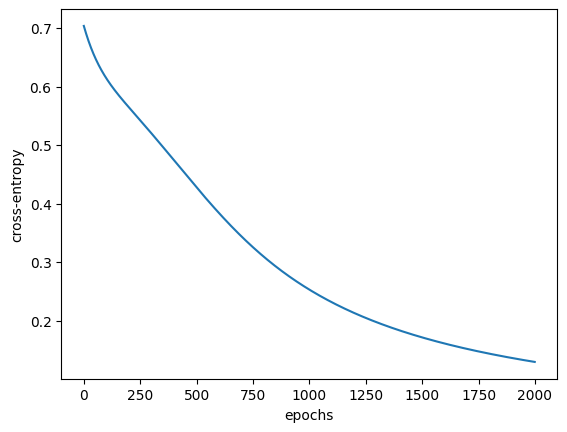

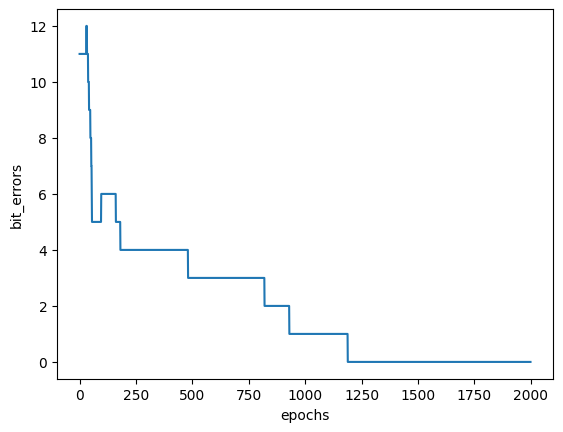

In [8]:
# Plot the results
pylab.figure()
pylab.plot(range(epochs), l)
pylab.xlabel('epochs')
pylab.ylabel('cross-entropy')
pylab.savefig('./figures/10.1_1.png')

pylab.figure()
pylab.plot(range(epochs), bl)
pylab.xlabel('epochs')
pylab.ylabel('bit_errors')
pylab.savefig('./figures/10.1_2.png')

pylab.show()